### <span style="color:red">Lorenzo Albano, 967738</span>

# <span style="color:red"> ESERCIZIO 3.1:</span>  Plain vanilla option pricing

La teoria di Black-Scholes assume che l'evoluzione temporale del prezzo di un asset sia stocastica e segua un moto Brawniano geometrico (GBM), caratterizzato dai seguenti parametri (si riportano i valori numerici usati in simulazione): 

- Prezzo dell'asset al tempo $t=0$: $S(0)=100$
- Tempo complessivo: $T=1$
- Prezzo di esercizio (prezzo al quale l'investitore può esercitare il diritto di acquistare (call) o vendere (put)): $K=100$
- Tasso d'interesse privo di rischio: $r=0.1$
- Volatilità: $\sigma=0.25$

Nota: si indica con $\mathcal{N}(\mu,\sigma^2)$ una distribuzione Gaussiana con $\mu$ valor medio e $\sigma^2$ varianza. 

Si è calcolato il prezzo finale del bene attraverso due modalità:

1. campionando direttamente $S(T)$ per un GBM$(r,\sigma^2)$ 

Formula di $S(T)$ in un unico calcolo: $\hspace{2cm}S(T) = S(0) \exp\left[ \left(\mu-\frac{1}{2}\sigma^2\right)t+\sigma W(T)\right]$

2. discretizzando il GBM$(r,\sigma^2)$, ovvero dividendo in 100 sotto-intervalli $[0,T]$, campionando $S(t_n)=\frac{T}{100}\cdot n$ con $n=0,1,2,...,100$ 

Formula di $S(t_i)$ per calcolo discreto di $S(T)$:
$\hspace{0.5cm}S(t_{i}) = S(t_{i-1}) \exp\left[ \left(\mu-\frac{1}{2}\sigma^2\right)(t_{i}-t_{i-1})
    +\sigma Z_{i}\sqrt{t_{i}-t_{i-1}}\right]$

Con $W(T)\sim\mathcal{N}(0,T)$ e $Z_i\sim\mathcal{N}(0,1)$

Il calcolo del prezzo di _Call-option_ Europea (C) e _Put-option_ Europea (P) è dato da:

$$C = e^{-r\cdot T}\cdot Max\;(0, S_T-K)\hspace{2cm}P = e^{-r\cdot T}\cdot Max\;(0, K-S_T)$$


Sono state divise in $100$ blocchi $10^6$ simulazioni Monte Carlo. Per ogni stima di $S(T)$ sono stati calcolati i prezzi di _Call_ e _Put_ per le opzioni Europee e i loro valori medi per ogni blocco. Le medie globali progressive e i rispettivi errori (deviazioni standard della media) sono riportati nei grafici seguenti.

Per un confronto, il valore atteso nei grafici è dato dal valore analitico dalla teoria di Black-Scholes, calcolato come segue.

### Valori analitici (valori attesi)

Soluzione analitica della teoria di Black-Scholes per determinare il prezzo al tempo $t<T$: 
- European Call-option price:
$$ C\left[ S(t),t \right] = S(t) N(d_1) -K e^{-r(T-t)} N(d_2) $$
- European Put-option price:
$$ P\left[ S(t),t \right] = S(t) \left[ N(d_1)-1\right] -K e^{-r(T-t)} \left[ N(d_2)-1\right]$$

con
$$d_1 = \frac{1}{\sigma\sqrt{T-t}}\left[ \ln \left( \frac{S(t)}{K} \right) + \left( r+\frac{\sigma^2}{2} (T-t) \right)\right]\hspace{1cm}\hbox{e}\hspace{1cm}d_2 = d_1 - \sigma\sqrt{T-t}$$

dove
$$ N(x) = \int_{-\infty}^{x} dz \, e^{-\frac{z^2}{2}} = \frac{1}{2} \left[ 1+ {\rm erf} \left( \frac{x}{\sqrt{2}}\right) \right]$$
è la cumulativa della Gaussiana $\sim \mathcal{N}(\mu=0,\sigma^2=1)$,
con
$${\rm erf}(x) = \frac{2}{\sqrt{\pi}}\int_{0}^{x} dz \, e^{-z^2}$$

In [3]:
import scipy
from scipy.special import erf
import numpy
from numpy import exp
from numpy.lib.scimath import log, sqrt

# data
S0 = 100.
K = 100.
T = 1.
r = 0.1
sigma = 0.25
t=0

def N(x):
    return 0.5 * (1. + erf(x / sqrt(2.)))

def black_scholes(S0, K, T, r, sigma):
    d1 = 1./(sigma * sqrt(T)) * (log(S0 / K) + (r + (sigma**2) / 2.) * T)
    d2 = d1 - sigma * sqrt(T)
    C = S0 * N(d1) - K * exp(-r * T) * N(d2)
    P = S0 *(N(d1) - 1.) - K * exp(-r * T) * (N(d2)-1.)
    return C, P

if __name__ == "__main__":
    call, put = black_scholes(S0, K, T, r, sigma)
    print("Valori analitici con BLACK-SCHOLES:")
    print("call: ", call)
    print("put: ", put)

Valori analitici con BLACK-SCHOLES:
call:  14.975790778311286
put:  5.4595325819072364


## <span style="color:blue"> GRAFICO A) </span> Call option: S(T) ricavato da unico calcolo

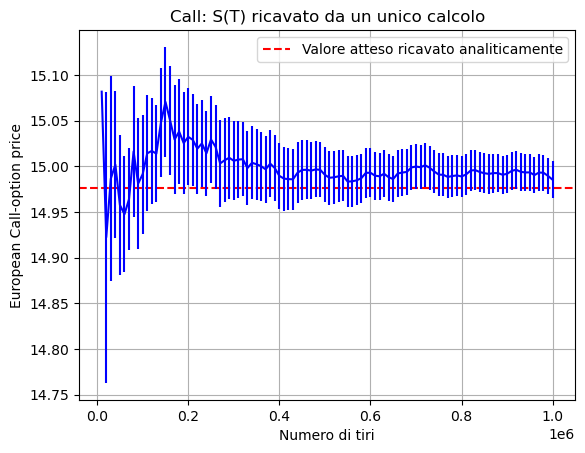

In [8]:
import matplotlib.pyplot as plt
import numpy as np

# Vettore di numeri ordinati da 1 a 100 (infatti il primo blocco contiene già 10000 numeri, non ha senso partire da 0!)
x = np.arange(1, 101) 

# Carica i dati dal file
data = np.loadtxt('C__ST_unico.out')

x*=10000  # Tiri per blocco


# Disegna una retta orizzontale sul valore atteso
plt.axhline(y=14.975790778311286, color='r', linestyle='--', label="Valore atteso ricavato analiticamente")

plt.legend()

plt.errorbar(x,data[:,0],yerr=data[:,1], color='blue')
plt.xlabel('Numero di tiri')
plt.ylabel('European Call-option price')
plt.title('Call: S(T) ricavato da un unico calcolo')
plt.grid(True)
plt.show()

## <span style="color:green"> GRAFICO B) </span> Put option: S(T) ricavato da unico calcolo

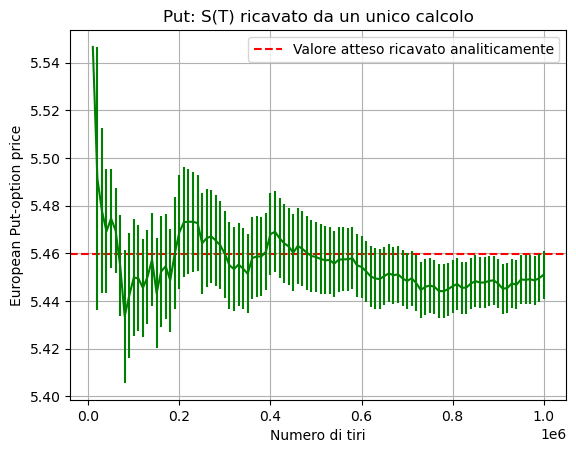

In [7]:
import matplotlib.pyplot as plt
import numpy as np

# Vettore di numeri ordinati da 1 a 100 (infatti il primo blocco contiene già 10000 numeri, non ha senso partire da 0!)
x = np.arange(1, 101) 

# Carica i dati dal file
data = np.loadtxt('P__ST_unico.out')

x*=10000  # Tiri per blocco

# Disegna una retta orizzontale sul valore atteso
plt.axhline(y=5.4595325819072364, color='r', linestyle='--', label="Valore atteso ricavato analiticamente")

plt.legend()

plt.errorbar(x,data[:,0],yerr=data[:,1], color='green')
plt.xlabel('Numero di tiri')
plt.ylabel('European Put-option price')
plt.title('Put: S(T) ricavato da un unico calcolo')
plt.grid(True)
plt.show()

## <span style="color:orange"> GRAFICO C) </span> Call option: S(T) ricavato da calcolo discreto

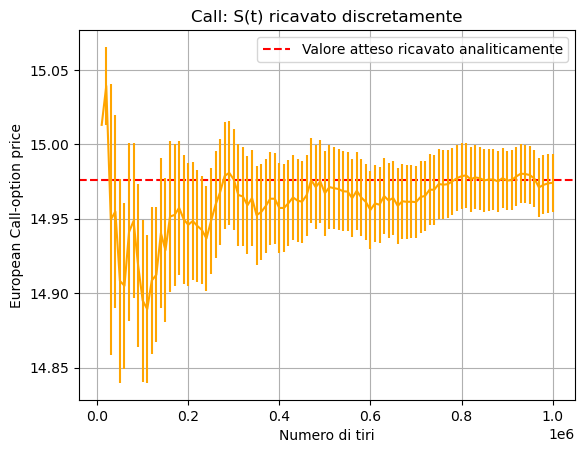

In [12]:
import matplotlib.pyplot as plt
import numpy as np

# Vettore di numeri ordinati da 1 a 100 (infatti il primo blocco contiene già 10000 numeri, non ha senso partire da 0!)
x = np.arange(1, 101) 

# Carica i dati dal file
data = np.loadtxt('C__ST_discreto.out')

x*=10000  # Tiri per blocco


# Disegna una retta orizzontale sul valore atteso
plt.axhline(y=14.975790778311286, color='r', linestyle='--', label="Valore atteso ricavato analiticamente")

plt.legend()

plt.errorbar(x,data[:,0],yerr=data[:,1], color='orange')
plt.xlabel('Numero di tiri')
plt.ylabel('European Call-option price')
plt.title('Call: S(t) ricavato discretamente')
plt.grid(True)
plt.show()

## <span style="color:gray"> GRAFICO D) </span> Put option: S(T) ricavato da calcolo discreto

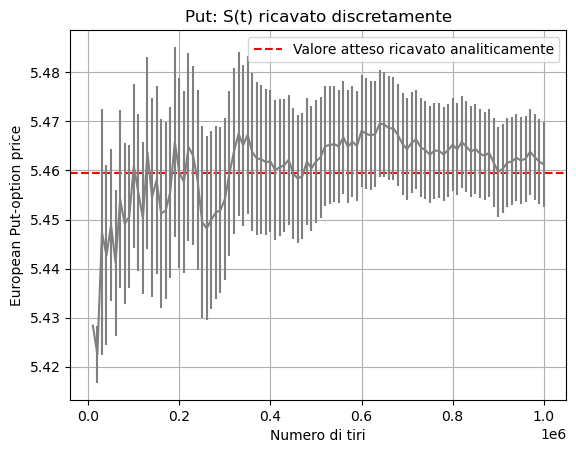

In [15]:
import matplotlib.pyplot as plt
import numpy as np

# Vettore di numeri ordinati da 1 a 100 (infatti il primo blocco contiene già 10000 numeri, non ha senso partire da 0!)
x = np.arange(1, 101) 

# Carica i dati dal file
data = np.loadtxt('P__ST_discreto.out')

x*=10000  # Tiri per blocco

# Disegna una retta orizzontale sul valore atteso
plt.axhline(y=5.4595325819072364, color='r', linestyle='--', label="Valore atteso ricavato analiticamente")

plt.legend()

plt.errorbar(x,data[:,0],yerr=data[:,1], color='gray')
plt.xlabel('Numero di tiri')
plt.ylabel('European Put-option price')
plt.title('Put: S(t) ricavato discretamente')
plt.grid(True)
plt.show()